In [1]:
import numpy as np
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


##### Load the dataset

In [4]:
data_ = pd.read_csv('/home/future/Desktop/Data_science_class/Case_Study/drive-download-20230314T185227Z-001/mavencloudlimited_call_records.csv', index_col=0 ,parse_dates=['call_end_date'])

##### Sample how it looks like

In [ ]:
data_.sample(10)

destination_person_id  source_person_id  account_age account_state  \
call_id                                                                       
2843730                 154746            146531          677  In Repayment   
2828007                   2159             66507          723  In Repayment   
2815765                 110382            100497          751      Complete   
2840728                 138265            239239          686  In Repayment   
2830719                 100499            382947            0  In Repayment   
2854431                  80646            317859          141  In Repayment   
2828212                  86394            293484          223  In Repayment   
2855596                 378708            239082           16  In Repayment   
2832830                 337992            141191          680  In Repayment   
2852281                 338079             67075          882      Complete   

                   occupation    language call_direction  call_duration  \
call_id                                                                   
2843730                Farmer      Lusoga       Incoming           6.57   
2828007                 Other     English       Incoming           3.90   
2815765                Farmer  Lunyankore       Outgoing           3.20   
2840728           Shop Keeper  Lunyankore       Outgoing           0.13   
2830719                 Other     Lutooro       Incoming           5.52   
2854431  Small Business Owner     Luganda       Incoming          11.03   
2828212      Religious Leader     Luganda       Incoming          10.87   
2855596                Farmer     Lunyoro       Outgoing           3.40   
2832830             Boda Boda     Luganda       Incoming          16.23   
2852281  Small Business Owner       Lango       Incoming           3.50   

                       call_outcome       call_end_date  \
call_id                                                   
2843730  Needs Repair / Replacement 2017-10-31 06:00:00   
2828007               Call Resolved 2017-10-26 08:42:00   
2815765               Call Resolved 2017-10-23 08:05:00   
2840728        Customer Unreachable 2017-10-30 08:10:00   
2830719               Call Resolved 2017-10-26 18:10:00   
2854431               Call Resolved 2017-11-03 11:07:00   
2828212               Call Resolved 2017-10-26 09:27:00   
2855596        Customer Unreachable 2017-11-03 14:22:00   
2832830               Call Resolved 2017-10-27 12:56:00   
2852281               Call Resolved 2017-11-02 13:32:00   

                                               call_topics  \
call_id                                                      
2843730  9 Diode LED Light Bar Technical, Ready Radio N...   
2828007                                 Home Visit Inquiry   
2815765                                   Completions Call   
2840728                                   Completions Call   
2830719                                Account Association   
2854431              Does Not Charge Past Bottom SOC Light   
2828212                                    Overdue Account   
2855596                                        10 Day Call   
2832830               18 Diode LED Light Bar Non-Technical   
2852281                Balance Inquiry, Code Entry Support   

                       call_topic_group  
call_id                                  
2843730       Accessory Technical Issue  
2828007               Portfolio Health   
2815765                          Survey  
2840728                          Survey  
2830719                           Sales  
2854431  Technical/ Battery Performance  
2828212                         Finance  
2855596                          Survey  
2832830   Accessory Non-Technical Issue  
2852281                         Finance

##### Create a simple function [optional] to help with some descriptive stats of the data

In [ ]:
def stats(dataset):
    print(dataset.describe())
    print(dataset.shape)
    print(dataset.info())

In [ ]:
stats(data_)

       destination_person_id  source_person_id   account_age  call_duration
count           32028.000000      32028.000000  32028.000000   3.202800e+04
mean           176398.621956     238985.845354    342.367085  -1.565586e+03
std             97753.450380     106046.655869    306.645479   1.987238e+05
min                73.000000         89.000000    -10.000000  -2.514926e+07
25%            108351.000000     155159.000000     64.000000   1.550000e+00
50%            134577.000000     239082.000000    298.000000   3.580000e+00
75%            239005.000000     338348.250000    573.000000   6.200000e+00
max            387319.000000     387407.000000   1430.000000   5.787000e+01
(32028, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32028 entries, 2807990 to 2855837
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   destination_person_id  32028 non-null  int64         
 1   sourc

##### Check for null values within the dataset if any

In [ ]:
data_.isnull().sum()

destination_person_id     0
source_person_id          0
account_age               0
account_state             0
occupation               95
language                  1
call_direction            0
call_duration             0
call_outcome              0
call_end_date             0
call_topics               0
call_topic_group          0
dtype: int64

## **************************************** WARNING: ***********************************************
### You should not have dropped any rows with missing values since they contain other information that is useful for our analysis. Other questions depend on the other row cells and if you drop them, then your analysis might have incorrect results.
## ************************************* end WARNING: **********************************************

# Question One: (a) When do we experience the most incoming call traffic? 

> NOTE: This question is present continuous tense and thus needs an answer that is particular to a time period during the day rather than a particular date in the past. So if you answer it with a date, you are wrong. It requires a time interval or hour of the day that has the most incoming calls

In [ ]:
# create a data set with only incoming calls 

incoming = data_.loc[data_['call_direction'] == 'Incoming']
incoming.head()

destination_person_id  source_person_id  account_age account_state  \
call_id                                                                       
2807990                  86394            269898          301  In Repayment   
2807991                  86394            320367          122  In Repayment   
2807992                 212967            129042          695  In Repayment   
2807993                 114159            372282           22  In Repayment   
2807994                  86394            366749           44  In Repayment   

                    occupation language call_direction  call_duration  \
call_id                                                                 
2807990                 Farmer  Luganda       Incoming           0.78   
2807991                  Other  Luganda       Incoming           1.93   
2807992  Mechanic / Technician  Luganda       Incoming           4.90   
2807993                 Farmer    Lango       Incoming           3.77   
2807994            Electrician  Luganda       Incoming           2.62   

          call_outcome       call_end_date          call_topics  \
call_id                                                           
2807990  Call Resolved 2017-10-21 04:01:00         Call Dropped   
2807991  Call Resolved 2017-10-21 04:04:00    Code Not Received   
2807992  Call Resolved 2017-10-21 04:05:00  RP Remote Technical   
2807993  Call Resolved 2017-10-21 04:06:00    Code Not Received   
2807994  Call Resolved 2017-10-21 04:07:00    Code Not Received   

                  call_topic_group  
call_id                             
2807990                      Other  
2807991                      Codes  
2807992  Accessory Technical Issue  
2807993                      Codes  
2807994                      Codes

In [ ]:
# check to see the datatype of the call_end_date column
incoming.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24286 entries, 2807990 to 2855837
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   destination_person_id  24286 non-null  int64         
 1   source_person_id       24286 non-null  int64         
 2   account_age            24286 non-null  int64         
 3   account_state          24286 non-null  object        
 4   occupation             24231 non-null  object        
 5   language               24286 non-null  object        
 6   call_direction         24286 non-null  object        
 7   call_duration          24286 non-null  float64       
 8   call_outcome           24286 non-null  object        
 9   call_end_date          24286 non-null  datetime64[ns]
 10  call_topics            24286 non-null  object        
 11  call_topic_group       24286 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7

> Note: The call_end_date is already a datetime object and hence you don't need to do much with it but rather filter out the hours out of it

In [ ]:
# Strip the call_end_date column and create an hour column out of it
incoming["Hours"] = incoming['call_end_date'].dt.hour

# View the unique hours in the newly formulated column
incoming["Hours"].unique()

/var/folders/f1/w1nm5zzn7vz9rm92_gbr8qp40000gn/T/ipykernel_32157/2876886148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incoming["Hours"] = incoming['call_end_date'].dt.hour


array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  0])

In [ ]:
# Check the head of the incoming calls data set
incoming.head()

destination_person_id  source_person_id  account_age account_state  \
call_id                                                                       
2807990                  86394            269898          301  In Repayment   
2807991                  86394            320367          122  In Repayment   
2807992                 212967            129042          695  In Repayment   
2807993                 114159            372282           22  In Repayment   
2807994                  86394            366749           44  In Repayment   

                    occupation language call_direction  call_duration  \
call_id                                                                 
2807990                 Farmer  Luganda       Incoming           0.78   
2807991                  Other  Luganda       Incoming           1.93   
2807992  Mechanic / Technician  Luganda       Incoming           4.90   
2807993                 Farmer    Lango       Incoming           3.77   
2807994            Electrician  Luganda       Incoming           2.62   

          call_outcome       call_end_date          call_topics  \
call_id                                                           
2807990  Call Resolved 2017-10-21 04:01:00         Call Dropped   
2807991  Call Resolved 2017-10-21 04:04:00    Code Not Received   
2807992  Call Resolved 2017-10-21 04:05:00  RP Remote Technical   
2807993  Call Resolved 2017-10-21 04:06:00    Code Not Received   
2807994  Call Resolved 2017-10-21 04:07:00    Code Not Received   

                  call_topic_group  Hours  
call_id                                    
2807990                      Other      4  
2807991                      Codes      4  
2807992  Accessory Technical Issue      4  
2807993                      Codes      4  
2807994                      Codes      4

> Do a value counts of the hours columns and see how many people fall under each hour of the day

In [ ]:
# create a table to show the counts of each call for each particular call hour
incoming["Hours"].value_counts()



16    2194
12    2129
17    2103
18    1956
14    1929
13    1857
11    1815
15    1743
8     1531
9     1463
10    1365
6     1184
7     1166
4      823
5      799
19     227
0        2
Name: Hours, dtype: int64

> Plot a simple graph to show the above value counts 

Text(0, 0.5, 'Hours in 24HR')

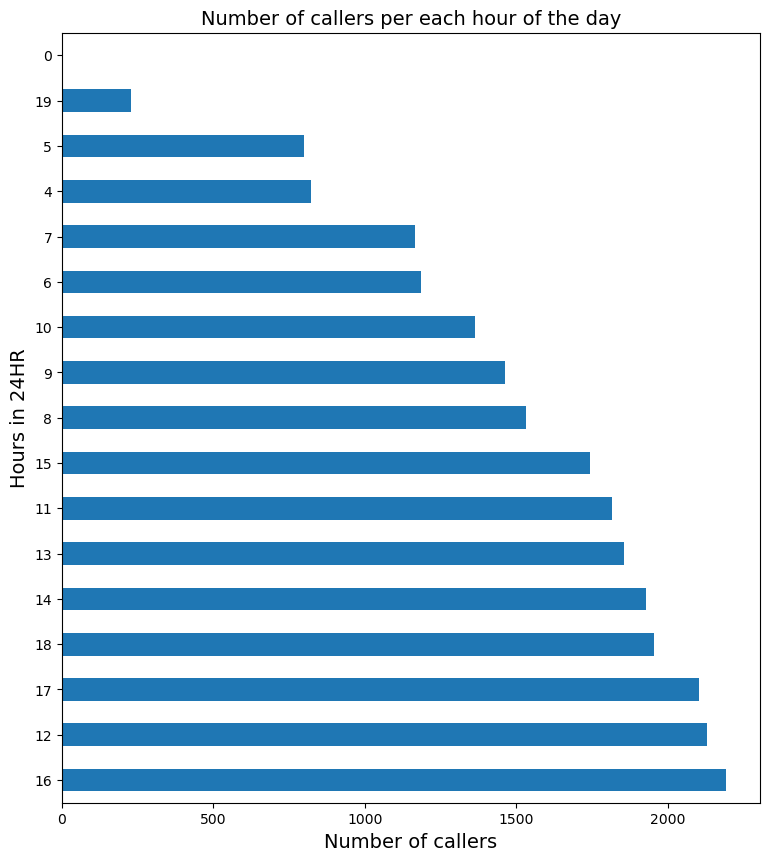

In [ ]:
# A simple graph to show this [you are free to add more styling to the graph]
plt.figure(figsize=(9,10))
ax = incoming['Hours'].value_counts().plot(kind='barh')
ax.set_title('Number of callers per each hour of the day', fontsize=14)
ax.set_xlabel('Number of callers', fontsize=14)
ax.set_ylabel('Hours in 24HR', fontsize=14)

> The plot above shows you the hour with the most callers and that is 1600Hrs

### (b) How does this vary over the course of the day

> On this quesstion just show call hours plotted against anything else. This will show some kind of variance. For example we are plotting hours against call_topic_group, broken down into account_state, with call_outcome as a hue to colour the dots

> Note: This is not the only possible way of answering this question though. You could answer this by showing how calls start, peak and then drop BUT this is tricky in this case since the distribution of the calls does not have a particular type e.g. Poison distribution or Gaussion/Normal distribution. So to be on the safe side, you just plot calls hours against anything else and explain from that angle.

Text(0.5, 1.03, 'Plots showing how incoming calls vary over the course of the day in regards to call_topic_group and account_state')

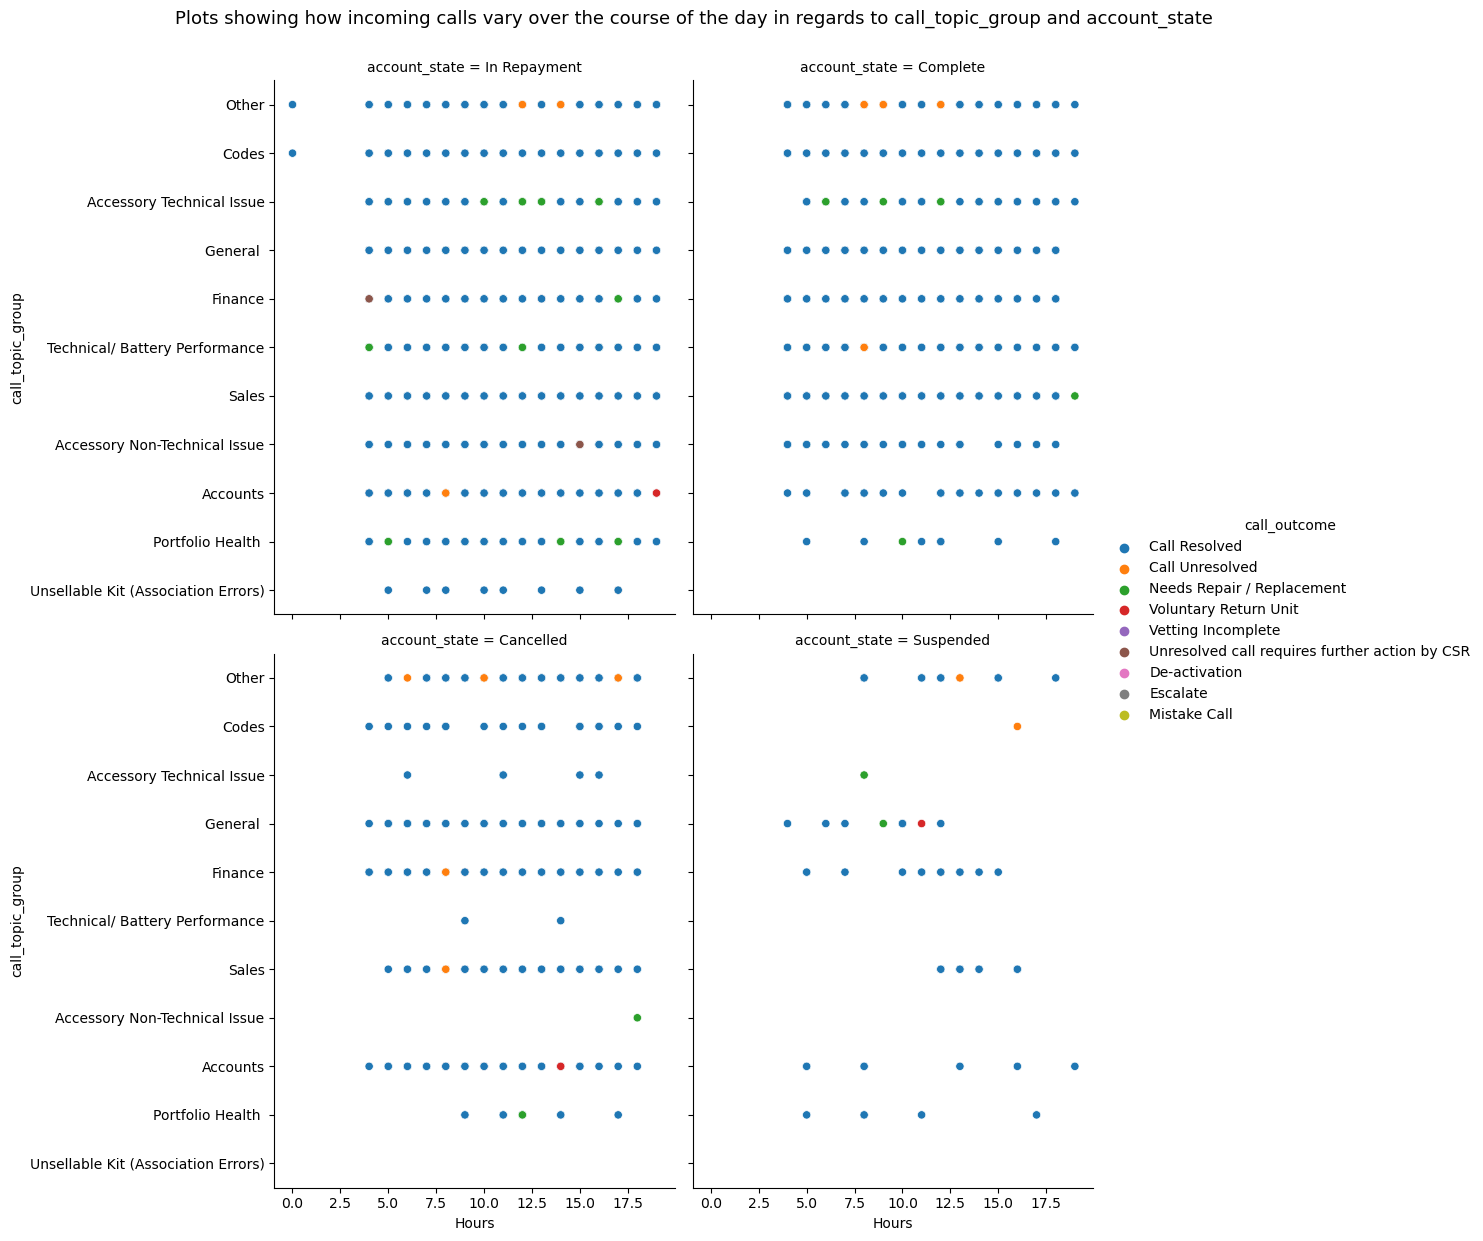

In [ ]:
# let us plot a graph to show how the calls vary over the course of the day

p = sns.relplot(data=incoming, x="Hours", y="call_topic_group", 
            hue="call_outcome", kind="scatter",
            col='account_state', col_wrap=2, 
            height=6)
p.fig.suptitle("Plots showing how incoming calls vary over the course of the day in regards to call_topic_group and account_state", y=1.03, fontsize=13)


### (c) How does this compare to the number of outgoing calls over the course of the day?

> Note: Just like before, this question also has several angles. One I can recommend is: to compare the incoming and outgoing calls, we need to look at how long they took. So we consider the call_duration

In [ ]:
# We can make a pivot table to sum up the number of incoming calls' and outgoing calls' durations in seconds for each call topic group 

compare_table = pd.pivot_table(data=data_, index='call_topic_group', columns='call_direction', values='call_duration', aggfunc=lambda x: np.sum(abs(x)), fill_value=0)
compare_table

call_direction                          Incoming  Outgoing
call_topic_group                                          
Accessory Non-Technical Issue            1152.71     19.63
Accessory Technical Issue                5044.52    150.11
Accounts                                 3496.14     54.62
Codes                                25182392.09    544.45
Finance                                 21344.50   2247.31
General                                  6708.20    709.23
Other                                25157905.34   1168.14
Portfolio Health                          787.59    233.76
Sales                                   24809.89   5302.85
Survey                                      0.00  20637.48
Technical/ Battery Performance          15069.52    273.00
Unsellable Kit (Association Errors)        74.20      9.08

In [ ]:
# We sum the call_duraction for each call_direction segment and then divide it with 60 to return number of minutes.
print("Incoming calls are a total of", abs(data_.loc[data_['call_direction'] == 'Incoming'].call_duration.sum())/60, "minutes.")
print("whereas")
print("Outgoing calls are a total of", abs(data_.loc[data_['call_direction'] == 'Outgoing'].call_duration.sum())/60, "minutes.")

Incoming calls are a total of 836232.248 minutes.
whereas
Outgoing calls are a total of 522.4943333333333 minutes.


> NOTE: To plot the pivot table above, we have to first melt it in order to turn it into a more comprehensive table.

In [ ]:
# Melt the pivot table by calling the melt function after the reset index one [this one resets the index back to the original numbers one while making the pivot table
# index in this case the call_topic_group, a column itself].
compare_table_melted = compare_table.reset_index().melt(id_vars = 'call_topic_group')

In [ ]:
# Take a sample look on the table and see how it looks
compare_table_melted.sample(100)

call_topic_group call_direction     value
14                             Accounts       Outgoing     54.62
23  Unsellable Kit (Association Errors)       Outgoing      9.08
1             Accessory Technical Issue       Incoming   5044.52
7                     Portfolio Health        Incoming    787.59
0         Accessory Non-Technical Issue       Incoming   1152.71
17                             General        Outgoing    709.23
21                               Survey       Outgoing  20637.48
10       Technical/ Battery Performance       Incoming  15069.52
13            Accessory Technical Issue       Outgoing    150.11
2                              Accounts       Incoming   3496.14

> We can now plot the melted table using a bar graph

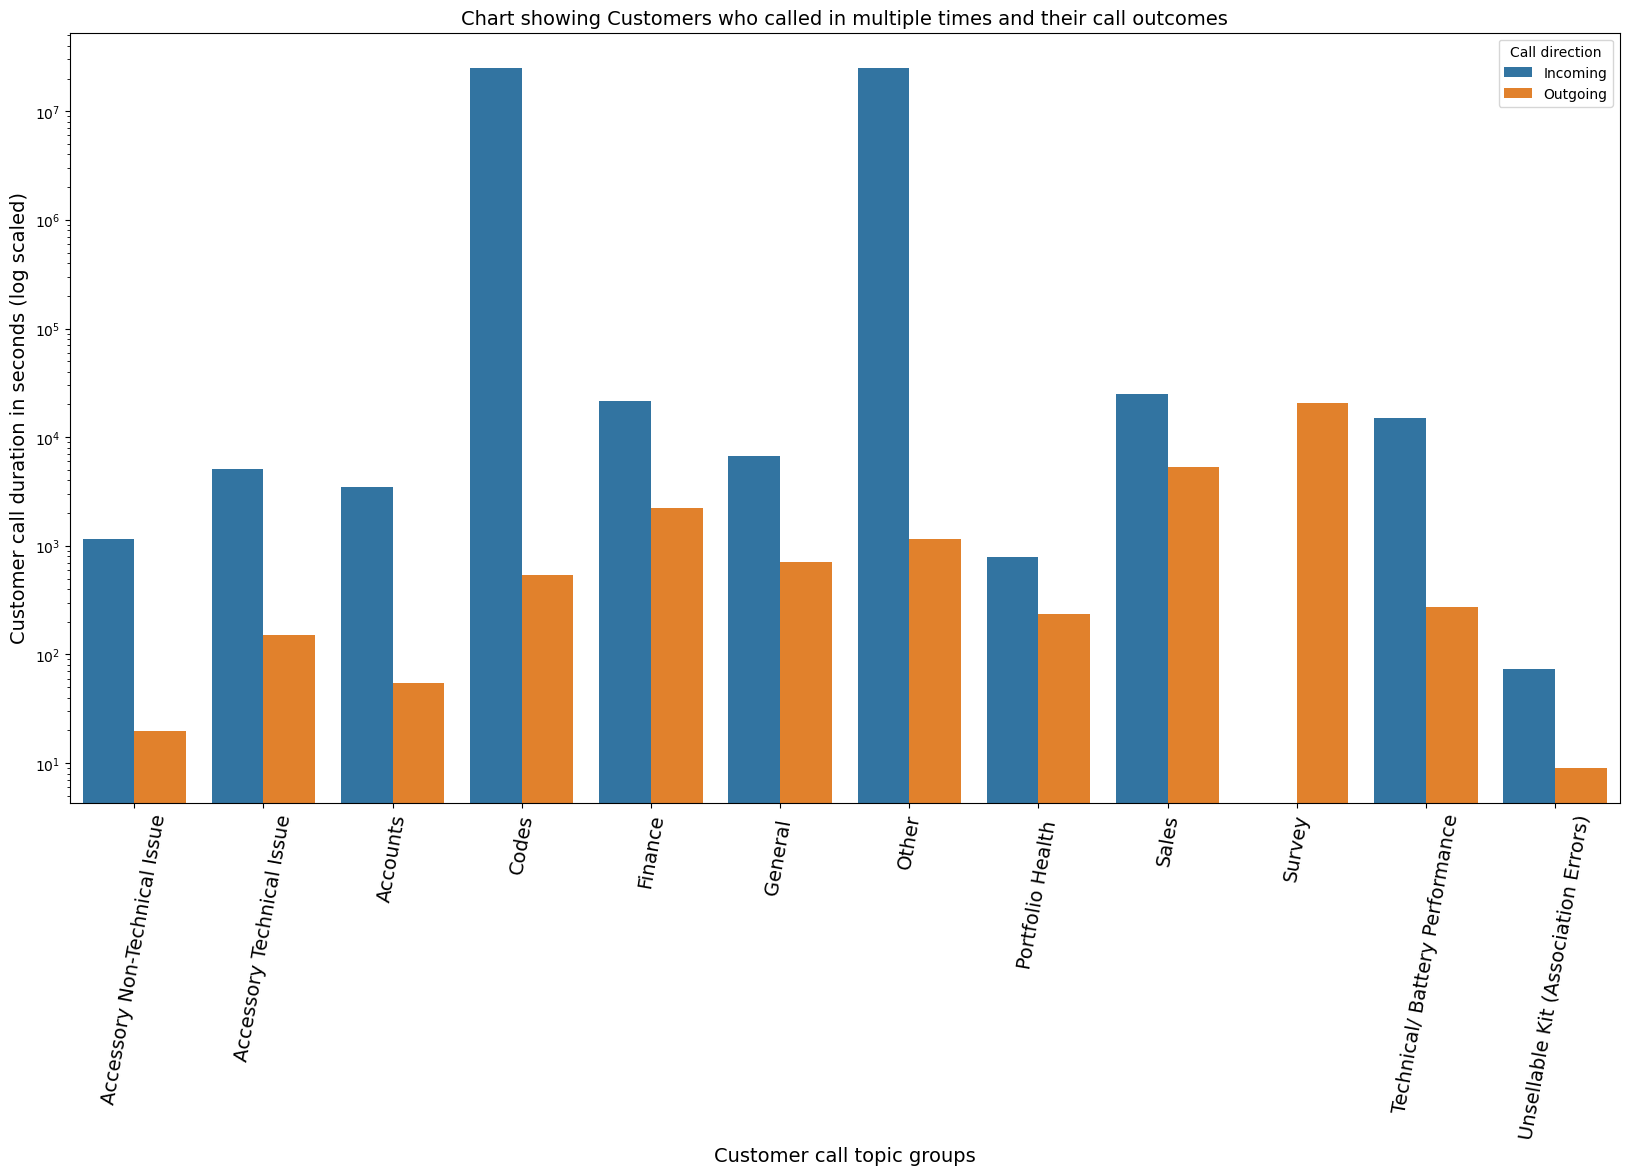

In [ ]:
plt.figure(figsize=(20,10))
pl = sns.barplot(data = compare_table_melted, x = 'call_topic_group', y = 'value', hue = 'call_direction')
pl.set_title('Chart showing Customers who called in multiple times and their call outcomes', fontsize=14)
pl.set_yscale('log')
pl.tick_params(axis='x', rotation=80, labelsize = 14)
pl.set_xlabel('Customer call topic groups',fontsize=14) 
pl.set_ylabel('Customer call duration in seconds (log scaled)', fontsize=14)
pl.legend(title='Call direction')

## Question 2: How many customers do we talk to each day?

In [ ]:
# Get the date column and pick out only the date leaving the hours off

data_["date_only"] = data_['call_end_date'].dt.date


In [ ]:
data_.head(3)

destination_person_id  source_person_id  account_age account_state  \
call_id                                                                       
2807990                  86394            269898          301  In Repayment   
2807991                  86394            320367          122  In Repayment   
2807992                 212967            129042          695  In Repayment   

                    occupation language call_direction  call_duration  \
call_id                                                                 
2807990                 Farmer  Luganda       Incoming           0.78   
2807991                  Other  Luganda       Incoming           1.93   
2807992  Mechanic / Technician  Luganda       Incoming           4.90   

          call_outcome       call_end_date          call_topics  \
call_id                                                           
2807990  Call Resolved 2017-10-21 04:01:00         Call Dropped   
2807991  Call Resolved 2017-10-21 04:04:00    Code Not Received   
2807992  Call Resolved 2017-10-21 04:05:00  RP Remote Technical   

                  call_topic_group   date_only  
call_id                                         
2807990                      Other  2017-10-21  
2807991                      Codes  2017-10-21  
2807992  Accessory Technical Issue  2017-10-21

> Pick out each unique date and then count the number of times it appears

> We use the groupby function to help us group the dates according to the date_only column. Then after we count the result.

> Resetting the index will help turn the result into a data frame which will be used to plot the two now created columns i.e. date_only and total_calls

In [ ]:


no_of_customers_talked_to_each_day = data_.groupby(['date_only'])['date_only'].count().reset_index(name='Total_calls')


> We show customers talked to each day using the date

In [ ]:
no_of_customers_talked_to_each_day

date_only  Total_calls
0   2017-10-21         2429
1   2017-10-22         2581
2   2017-10-23         2515
3   2017-10-24         2850
4   2017-10-25         2717
5   2017-10-26         2411
6   2017-10-27         2289
7   2017-10-28         1964
8   2017-10-29         2041
9   2017-10-30         2309
10  2017-10-31         2166
11  2017-11-01         2197
12  2017-11-02         1964
13  2017-11-03         1593
14  2070-01-01            2

[Text(0.5, 1.0, 'Plot to show number of customers talked to each day')]

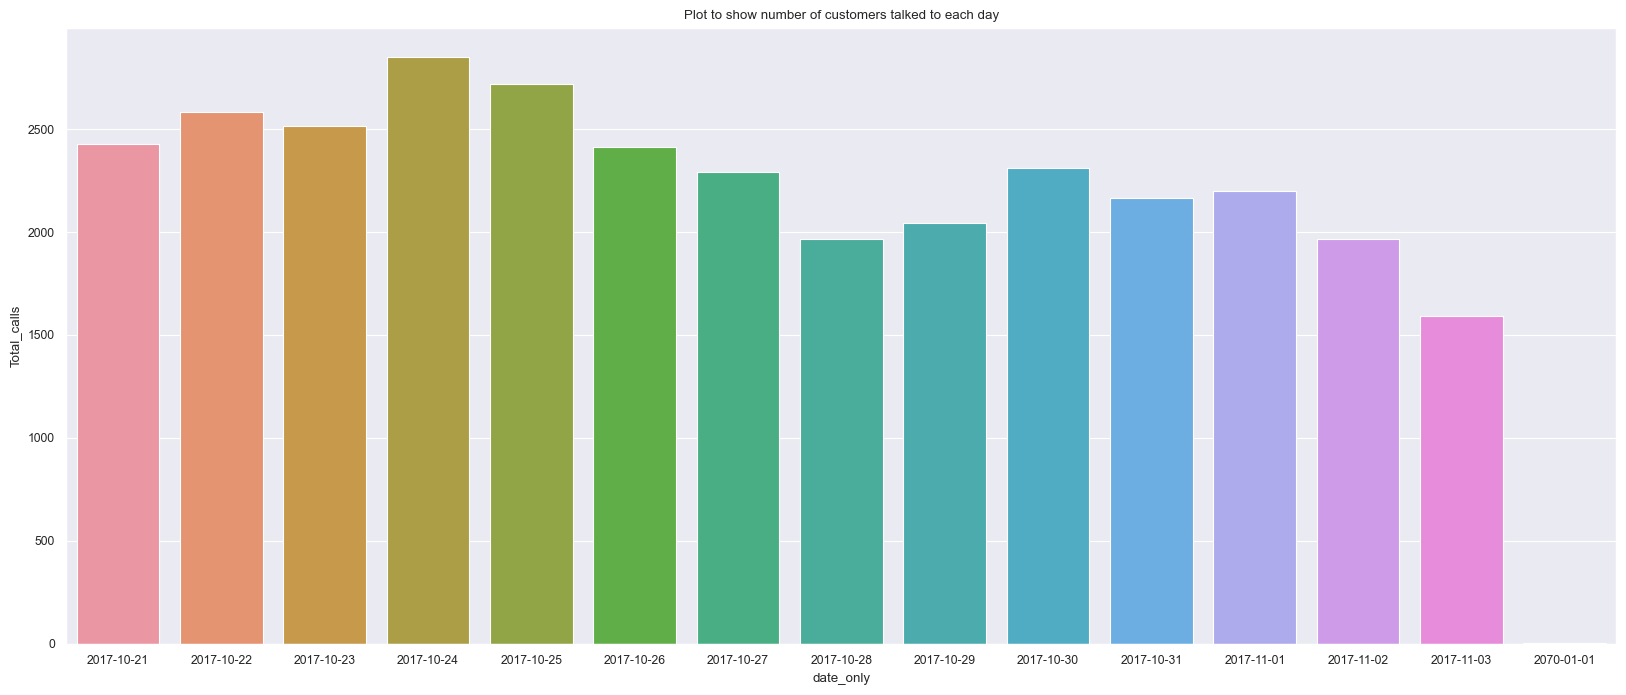

In [ ]:
# We can now plot the number of customers who called in each day
sns.set_theme()
sns.set_context("paper")
plt.figure(figsize=(20,8))
sns.barplot( data=no_of_customers_talked_to_each_day, x='date_only', y='Total_calls').set(title='Plot to show number of customers talked to each day')


#### Customers that called multiple times

> Select all the caller IDs that appear more than once. Keyword here is multiple. Multiple means more than ONE

In [ ]:
# Create a new variable to hold the multiple callers
multiple_time_callers = data_.source_person_id.value_counts().loc[lambda x: x>1].index

In [ ]:
# To prove that the multiple times variable holds only those people that called in multiple times, we do a value_counts on the source_person_id column.
# We get the multiple_time_callers series and run it over the source_person_id column in the original dataset [data_]
# This column is the one that holds the clients caller ids

# Turn the multiple_time_callers series into a list first
listed = list(multiple_time_callers)

# Use the above created list to serach for each item in their with the original dataframe
for id in listed:
    import operator as op
    if id in data_['source_person_id'].values:
        print(f"{id} has occurred {op.countOf(data_['source_person_id'].values, id)} times")
        

# Notice that the last id in the print result must have 2 times appearance as its result. Hence that means that truly we have mutliple_time_callers

212968 has occurred 734 times
212954 has occurred 570 times
212970 has occurred 514 times
77156 has occurred 400 times
100497 has occurred 400 times
239239 has occurred 394 times
239082 has occurred 372 times
212946 has occurred 372 times
108349 has occurred 365 times
114159 has occurred 354 times
124237 has occurred 329 times
239298 has occurred 182 times
239142 has occurred 173 times
114155 has occurred 135 times
86394 has occurred 107 times
338068 has occurred 94 times
212965 has occurred 89 times
116266 has occurred 84 times
338372 has occurred 82 times
63338 has occurred 80 times
114148 has occurred 78 times
24026 has occurred 66 times
338414 has occurred 63 times
96164 has occurred 63 times
100499 has occurred 57 times
134529 has occurred 57 times
124275 has occurred 55 times
338347 has occurred 54 times
108347 has occurred 54 times
157497 has occurred 53 times
157415 has occurred 51 times
338409 has occurred 51 times
51846 has occurred 48 times
59492 has occurred 48 times
338063

> Note: Unlike what we have done above, the code below counts the items themselves rather than counting the number of times they apear. we have to take into consideration that we are counting the unique items only

In [ ]:
# we import the counter function from the collections package which will help us in counting the occurrences inside the multiple_time_callers object
# after turning it into a list


from collections import Counter

# check for uniques uniques
def checkIfDuplicatesAppearInList(listOfElems):
    ''' Check if given list contains any duplicates '''    
    for elem in listOfElems:
        if listOfElems.count(elem) > 1:
            return print(True, "Duplicates in list")
    return print(False, "No duplicates")

checkIfDuplicatesAppearInList(listed)




False No duplicates


In [ ]:
# Now  create variable num_values to hold the result of the counted callers
num_values = len(Counter(listed).keys())

# print the total of the multiple time callers
print("A total of ", num_values ," customers called in multiple times.")

A total of  5437  customers called in multiple times.


#### What were we discussing with the customers who contacted us multiple times?


> #### Here we are looking for the call topics of the multiple times callers

> pick only those rows that have multiple callers

> we get the list of multiple time callers and use it to filter the dataframe

In [ ]:

caller_topics = data_[data_['source_person_id'].isin(listed)]

# You can now list all the topics 
#list(caller_topics['call_topics'].value_counts())




In [ ]:
# or you can value count them

caller_topics['call_topics'].value_counts()

Completions Call                                                                                4226
Call Dropped                                                                                    1758
Code Not Received                                                                               1531
Ended Call- Hearing/Speaking Issues                                                             1439
10 Day Call                                                                                     1143
                                                                                                ... 
Code Not Received, Success Call Follow Up                                                          1
Call Dropped, SOC Jumps to Empty, Technical product inquiry                                        1
Balance Inquiry, Interested In ReadyPay, Lockout Date Inquiry                                      1
Overdue Account, SMS/Promotional Inquiry                                                   

> Since the actual call topics are very many, we rather plot their groups instead

In [ ]:
# We can go ahead and plot the call topics of the people that called in multiple times under each call topic group
# first get the value counts of each call_topic_group and group them against each call_topic_group
# A simple grouping will do

call_topic_groupings = caller_topics.groupby(['call_topic_group'])['call_topic_group'].count().reset_index(name='Number_of_callers')
call_topic_groupings


call_topic_group  Number_of_callers
0         Accessory Non-Technical Issue                110
1             Accessory Technical Issue                386
2                              Accounts                349
3                                 Codes               4271
4                               Finance               2835
5                              General                 851
6                                 Other               4976
7                     Portfolio Health                 124
8                                 Sales               2510
9                                Survey               5729
10       Technical/ Battery Performance               1394
11  Unsellable Kit (Association Errors)                  8

Text(0, 0.5, 'Number of Customers')

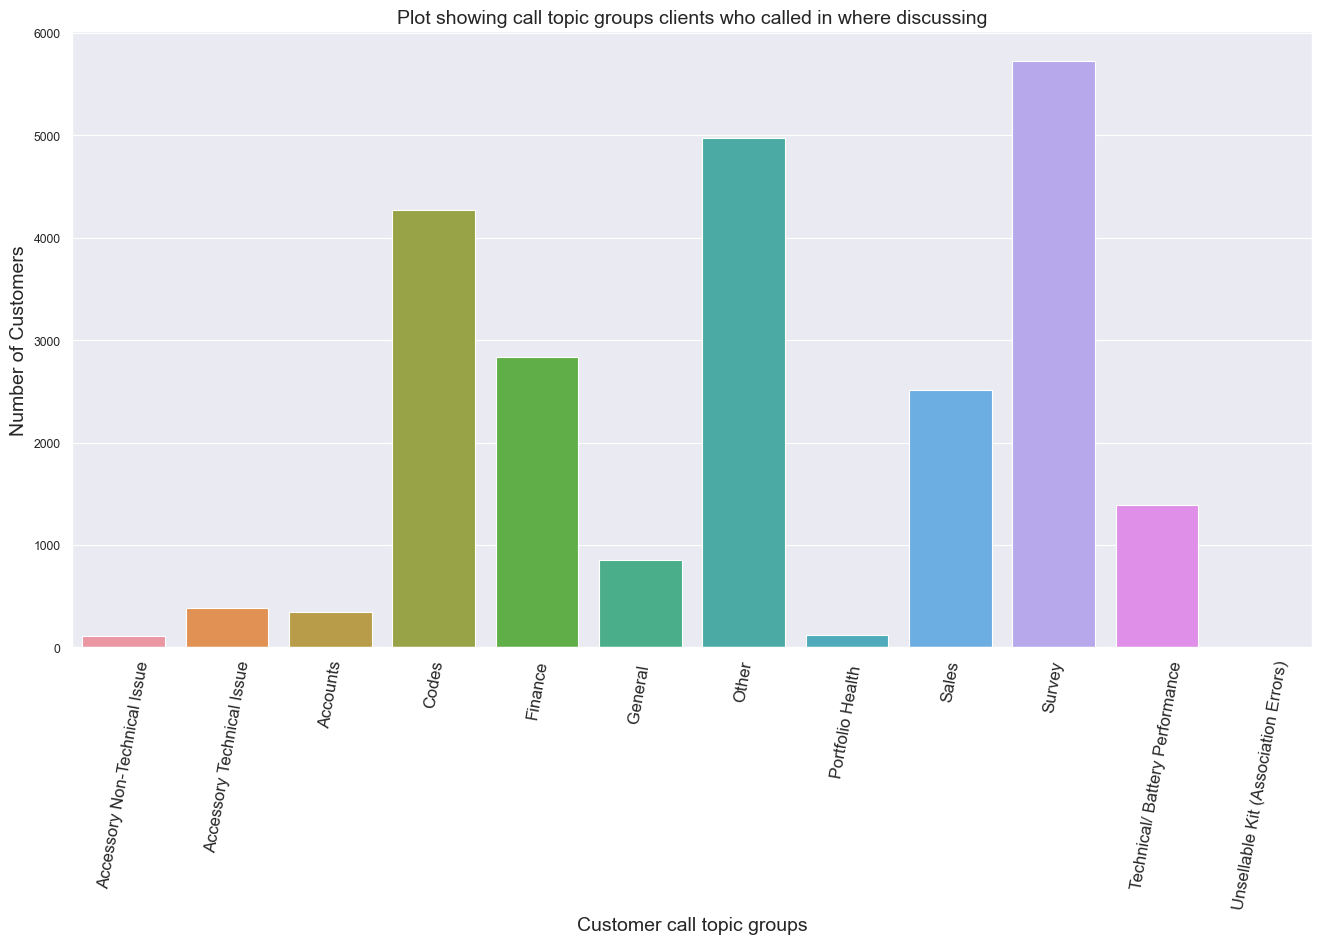

In [ ]:
plt.figure(figsize=(16,8))
pl = sns.barplot(data=call_topic_groupings, x='call_topic_group', y='Number_of_callers')
pl.set_title('Plot showing call topic groups clients who called in where discussing', fontsize=14)
#pl.set_yscale('log')
pl.tick_params(axis='x', rotation=80, labelsize = 12)
pl.set_xlabel('Customer call topic groups',fontsize=14) 
pl.set_ylabel('Number of Customers', fontsize=14)
#pl.legend(title='Call direction')

> You then can get the total number of the call topics and print it since it is the actual answer [part of the answer], after listing all the topics, like we did above

In [ ]:
# You can as well print their total number

print("There are a total of ", len(list(caller_topics['call_topics'].unique())), "topics from the people that called in multiple times")

There are a total of  924 topics from the people that called in multiple times


# Qn: 3 Which customers are more likely to churn and why?

> Customer Churn is a metric used to quantify the number of customers who left the company

* We can have several metrics [columns] to consider for this analysis. But we need to keep as simple as possible.
* So we can take only one or two columns and consider them i.e. We need to select incoming calls first.
* then we look at the call outcome of those calls. We then look at the topics of these calls and if how many people called in multiple times on the same topics
* after that, we can then look at the occupations of these multiple callers on the same topic and deduce that these people might churn

In [ ]:

incoming.head()

destination_person_id  source_person_id  account_age account_state  \
call_id                                                                       
2807990                  86394            269898          301  In Repayment   
2807991                  86394            320367          122  In Repayment   
2807992                 212967            129042          695  In Repayment   
2807993                 114159            372282           22  In Repayment   
2807994                  86394            366749           44  In Repayment   

                    occupation language call_direction  call_duration  \
call_id                                                                 
2807990                 Farmer  Luganda       Incoming           0.78   
2807991                  Other  Luganda       Incoming           1.93   
2807992  Mechanic / Technician  Luganda       Incoming           4.90   
2807993                 Farmer    Lango       Incoming           3.77   
2807994            Electrician  Luganda       Incoming           2.62   

          call_outcome       call_end_date          call_topics  \
call_id                                                           
2807990  Call Resolved 2017-10-21 04:01:00         Call Dropped   
2807991  Call Resolved 2017-10-21 04:04:00    Code Not Received   
2807992  Call Resolved 2017-10-21 04:05:00  RP Remote Technical   
2807993  Call Resolved 2017-10-21 04:06:00    Code Not Received   
2807994  Call Resolved 2017-10-21 04:07:00    Code Not Received   

                  call_topic_group  Hours  
call_id                                    
2807990                      Other      4  
2807991                      Codes      4  
2807992  Accessory Technical Issue      4  
2807993                      Codes      4  
2807994                      Codes      4

In [ ]:
# Get the call_outcome column and view the unique values in there. We need to drop off those out come results that are resolved and mistake calls
incoming['call_outcome'].value_counts()

Call Resolved                                     22784
Call Unresolved                                     786
Needs Repair / Replacement                          556
Vetting Incomplete                                   88
Voluntary Return Unit                                41
De-activation                                        11
Escalate                                             10
Unresolved call requires further action by CSR        9
Mistake Call                                          1
Name: call_outcome, dtype: int64

#### Analysis of the above results

* There are several results that we can consider and others not. 
* For example, results like Call Resolved, Mistake Call can be dropped since they don't fit our narative 
* Also, Voluntary Return Unit could be left out since it signifies that a customer brought back the unit on their own terms
* Vetting incomplete is another result that can be discarded since it means that that person didn't finish the customer inauguration process. Hence didn't become a customer
* The De-activation result also means that that customer got deactivated from the company clients' list and hence it was voluntary
* The rest of the results are suitable for us to break down and see which customers are under each

In [ ]:
# Now we can drop those values. Select incoming data set to only have those rows whose values in the call_outcome column are not Call Resolved and Mistake Call 
# create a for loop to do the dropping

list_to_drop = ['Call Resolved', 'Mistake Call', 'Vetting Incomplete', 'De-activation', 'Voluntary Return Unit']

for item in list_to_drop:
    incoming = incoming[(incoming.call_outcome != item)]


In [ ]:
# Check to verify
incoming['call_outcome'].value_counts()

Call Unresolved                                   786
Needs Repair / Replacement                        556
Escalate                                           10
Unresolved call requires further action by CSR      9
Name: call_outcome, dtype: int64

#### NOTE:  There are several ways of answering this question, and for this case for us to get the people who are more likely to churn by occupation, we:

* Have gone through several steps to first get the type of calls coming in i.e. Incoming calls only
* We have searched the incoming set and value_counted the call_out_come to help us see what the result of the call the source_person_id got
* After that we are looking at getting those results and filter some that don't make sense as regards to churn i.e dropped columns that we think don't lead to a person stopping a subscription ['Call Resolved', 'Mistake Call', 'Vetting Incomplete', 'De-activation', 'Voluntary Return Unit']
* We are making a list of the remaining results that would make a person churn i.e. Call Unresolved, Needs Repair / Replacement, Escalate and Unresolved call requires further action by CSR


> Caution: I am considering incoming calls only since it more likely for a person to leave a service when they are the ones calling in to get a solution than them receiving a call. This is a bold move that is subject to discussion anyway.

In [ ]:
# Save the value counts in a varibale called cooc. This variable is to help us sort through when selecting the occupations
cooc = incoming['source_person_id'].value_counts()

In [ ]:
# save only those source_person_ids that appear more than once in the same varibale
cooc = cooc[cooc > 1].index.tolist()

In [ ]:
# first check length of data set before dropping the source_person_ids that called in once
len(incoming)

1361

> Having the list of source_person_ids that called in multiple times, we can it to filter the incoming data set to only remain with these ids in it

In [ ]:
incoming = incoming[~incoming.source_person_id.isin(cooc)]

In [ ]:
# Check length again after dropping to make sure that it has changed
len(incoming)

1060

In [ ]:
# Now let's see the occupation that appears the most under each call_out_come
# We can use a Pivot table to group the count of each occupation under each call_out_come

table = pd.pivot_table(data=incoming, index='occupation', columns='call_outcome', values='source_person_id', aggfunc='count')

In [ ]:
table

call_outcome                Call Unresolved  Escalate  \
occupation                                              
Accountant                              4.0       NaN   
Boda Boda                              28.0       NaN   
Broker                                  1.0       NaN   
Butcher                                 2.0       NaN   
Carpenter                              10.0       NaN   
Cattle Trader                           4.0       NaN   
Construction                           17.0       NaN   
Driver                                 13.0       NaN   
Electrician                             2.0       NaN   
Engineer                                1.0       NaN   
Farmer                                207.0       4.0   
Fisherman                              10.0       NaN   
Government / Civil Servant              3.0       NaN   
Health Worker                           4.0       NaN   
Herbalist                               1.0       NaN   
MM Agent                                5.0       NaN   
Market Trader                          13.0       NaN   
Mechanic / Technician                   5.0       NaN   
Money Changer                           1.0       NaN   
NGO Worker                              2.0       NaN   
Office Work                             9.0       NaN   
Other                                  47.0       NaN   
Police                                  3.0       NaN   
Religious Leader                        1.0       NaN   
Security Guard                          7.0       NaN   
Shop Keeper                            24.0       NaN   
Small Business Owner                   92.0       NaN   
Tailor                                  1.0       NaN   
Taxi Operator                           NaN       NaN   
Teacher                                44.0       NaN   
UPDF                                    6.0       1.0   

call_outcome                Needs Repair / Replacement  \
occupation                                               
Accountant                                         4.0   
Boda Boda                                         25.0   
Broker                                             NaN   
Butcher                                            3.0   
Carpenter                                         12.0   
Cattle Trader                                      4.0   
Construction                                      17.0   
Driver                                             7.0   
Electrician                                        NaN   
Engineer                                           NaN   
Farmer                                           163.0   
Fisherman                                         11.0   
Government / Civil Servant                         5.0   
Health Worker                                      8.0   
Herbalist                                          1.0   
MM Agent                                           5.0   
Market Trader                                     27.0   
Mechanic / Technician                              9.0   
Money Changer                                      NaN   
NGO Worker                                         3.0   
Office Work                                        2.0   
Other                                             29.0   
Police                                             7.0   
Religious Leader                                   2.0   
Security Guard                                     5.0   
Shop Keeper                                       19.0   
Small Business Owner                              69.0   
Tailor                                             9.0   
Taxi Operator                                      1.0   
Teacher                                           26.0   
UPDF                                               NaN   

call_outcome                Unresolved call requires further action by CSR  
occupation                                                                  
Accountant                                       

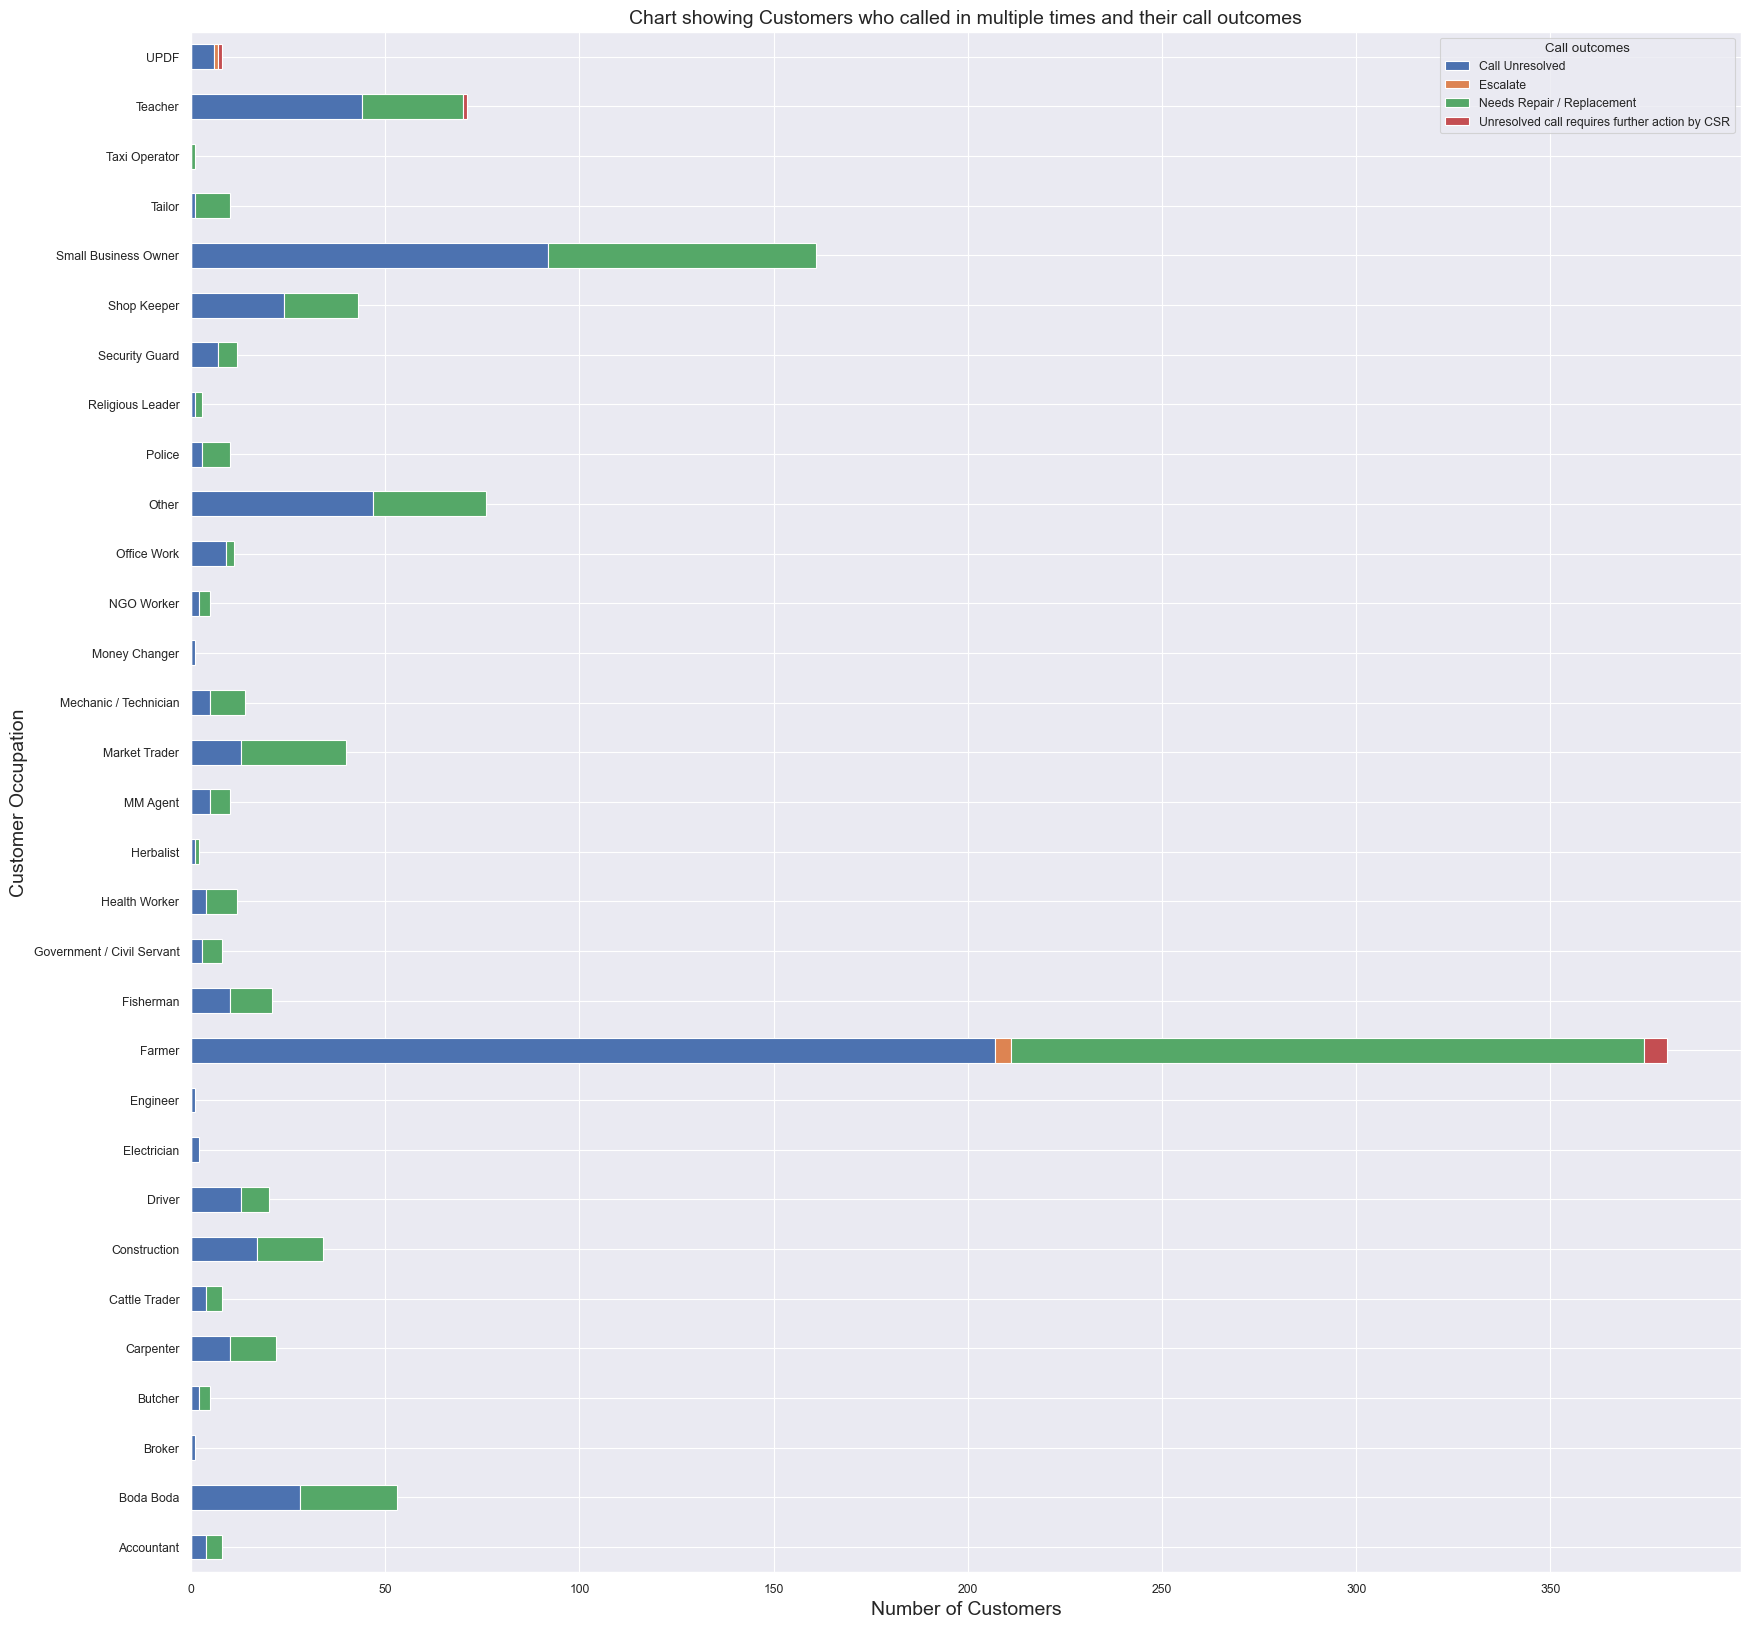

In [ ]:
# plotting the results

ax = table.plot(kind='barh', stacked=True, figsize=(20,20))
ax.set_title('Chart showing Customers who called in multiple times and their call outcomes', fontsize=14)
ax.set_xlabel('Number of Customers',fontsize=14) 
ax.set_ylabel('Customer Occupation', fontsize=14)
ax.legend(title='Call outcomes')

>  From the graph above, we can confidently tell that customers who are more likely to churn are Farmers. But someone could make a strong case for teachers in percentage-wise basis. 

> When you change the totals and find their percentages, you could see that teachers with calls unresolved, the percentage out of the total calls made by teachers is high. That is a food for thought for you to find out.

# Qn 4: Which call type [call_direction] are we most likely to expect in the future predictably from the available data we have at hand?

> Let us first look at the target varibale [call_direction] column and see what it constitutes. This observation is meant to help discover a few things about the variable namely: its distribution, unique values and so on

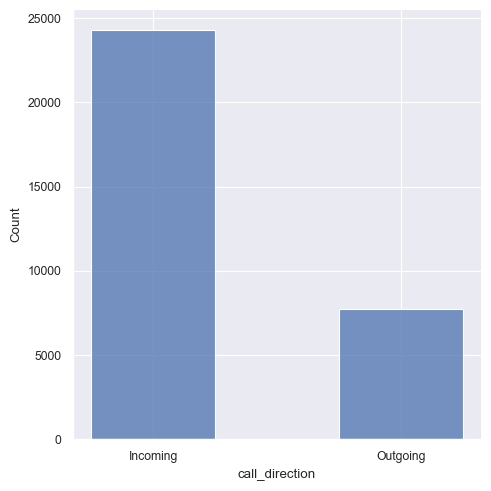

In [ ]:
# let us plot a distribution plot to see how the target variable looks like
sns.displot(data_, x = "call_direction", shrink = .5)

In [ ]:
data_.call_direction.value_counts()

Incoming    24286
Outgoing     7742
Name: call_direction, dtype: int64

> We can see from the plot above that incoming [24286] is more than outgoing [7742]. This gives us an overview of the distribution of the two values we have at hand.

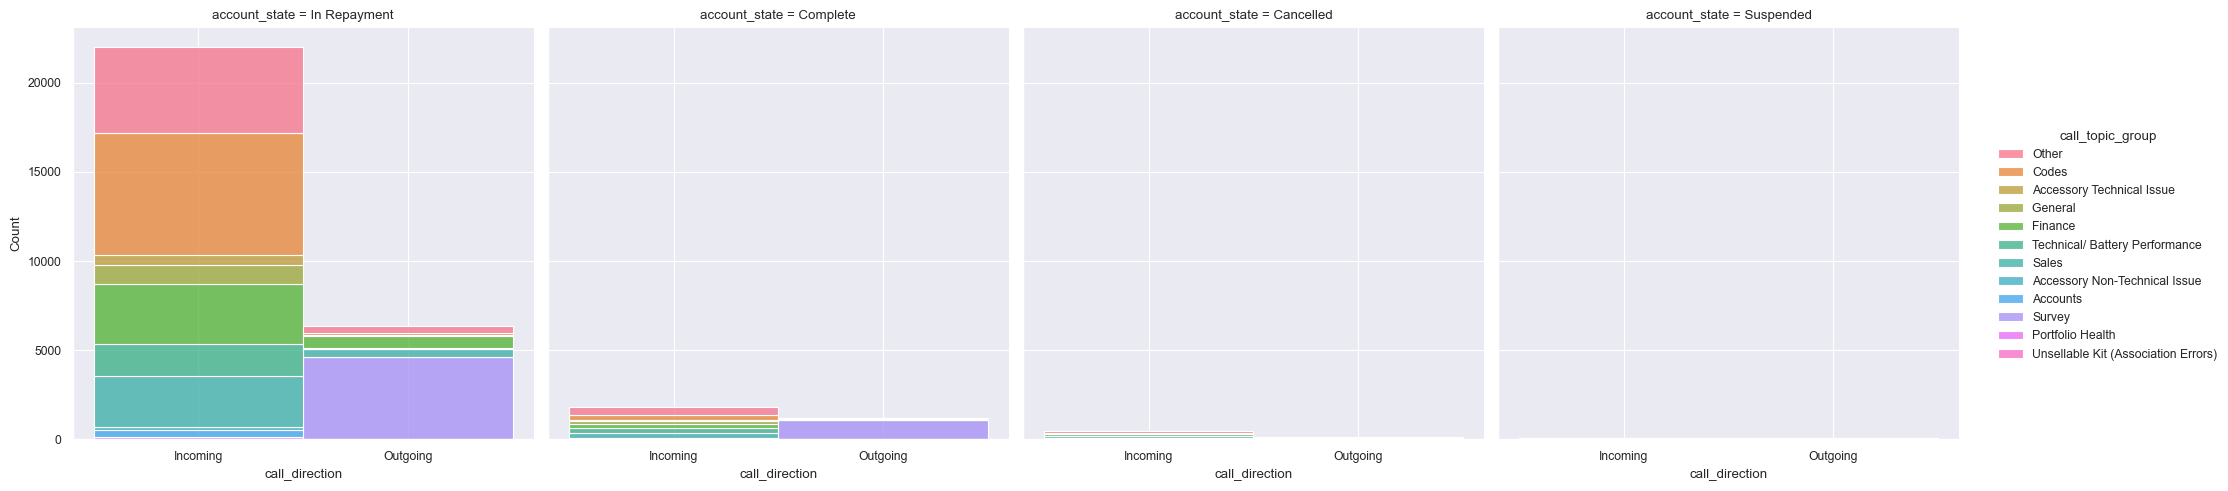

In [ ]:
# We can as well break down the distribution and narrow it down to account state and call topic group in regards to call direction. We can use this information for our reporting in case it is needed

sns.displot(data=data_, x="call_direction", hue="call_topic_group", multiple="stack", col="account_state")

> The little gap spaces in the bars might represent missing values. This we need to make sure is the reality or not. So the next steps are to make sure the data we are working with towards modelling, is clean and optimal.

>NOTE: The step of cleaning might have been done in the previous answers if at all you continued with the same data set but that might have been a risk since each answer has its own kind of solution. In any case, you can use the original set.

In [ ]:
data_.isnull().sum()

# We have 96 missing values and we can drop them since they are under occupation and language. It is difficult to just assign a random occupation or language to a caller.

destination_person_id     0
source_person_id          0
account_age               0
account_state             0
occupation               95
language                  1
call_direction            0
call_duration             0
call_outcome              0
call_end_date             0
call_topics               0
call_topic_group          0
date_only                 0
dtype: int64

In [ ]:
# Drop the missing values
data_ = data_.dropna()
data_.isnull().sum()

destination_person_id    0
source_person_id         0
account_age              0
account_state            0
occupation               0
language                 0
call_direction           0
call_duration            0
call_outcome             0
call_end_date            0
call_topics              0
call_topic_group         0
date_only                0
dtype: int64

> Now the evidence in the graphs above have already given us the answer but we need to verify this with some statistical or machine learning models and also for exam passing purposes

In [ ]:
# Now we need to split the data into different sets since we are dealing with discrete data or categorical data set. But before we can do all this, we first have to encode the categorical variable columns

from sklearn.preprocessing import LabelEncoder

objList = data_.select_dtypes(include = "object").columns
objList = objList[:-1] # drop the last column i.e. date_only
print (objList)

Index(['account_state', 'occupation', 'language', 'call_direction',
       'call_outcome', 'call_topics', 'call_topic_group'],
      dtype='object')


In [ ]:
le = LabelEncoder()

for feat in objList:
    data_[feat] = le.fit_transform(data_[feat].astype(str))

# drop the date_only colum from the dataset since it is a derived column
data_ = data_.iloc[:,:-1]

print (data_.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31933 entries, 2807990 to 2855837
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   destination_person_id  31933 non-null  int64         
 1   source_person_id       31933 non-null  int64         
 2   account_age            31933 non-null  int64         
 3   account_state          31933 non-null  int64         
 4   occupation             31933 non-null  int64         
 5   language               31933 non-null  int64         
 6   call_direction         31933 non-null  int64         
 7   call_duration          31933 non-null  float64       
 8   call_outcome           31933 non-null  int64         
 9   call_end_date          31933 non-null  datetime64[ns]
 10  call_topics            31933 non-null  int64         
 11  call_topic_group       31933 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(10)
memory u

In [ ]:
data_

destination_person_id  source_person_id  account_age  account_state  \
call_id                                                                        
2807990                  86394            269898          301              2   
2807991                  86394            320367          122              2   
2807992                 212967            129042          695              2   
2807993                 114159            372282           22              2   
2807994                  86394            366749           44              2   
...                        ...               ...          ...            ...   
2855830                 338414            361079           68              2   
2855832                 157397            302921          183              2   
2855835                  80646            229800          386              2   
2855836                 338372              8029         1146              0   
2855837                 124255            387315            0              2   

         occupation  language  call_direction  call_duration  call_outcome  \
call_id                                                                      
2807990          11        12               0           0.78             0   
2807991          24        12               0           1.93             0   
2807992          19        12               0           4.90             0   
2807993          11        10               0           3.77             0   
2807994           9        12               0           2.62             0   
...             ...       ...             ...            ...           ...   
2855830          29        18               0           6.55             0   
2855832          11        23               0          12.90             0   
2855835          11        12               0           1.25             0   
2855836           2         3               0           2.98             0   
2855837          29        12               0           3.08             0   

              call_end_date  call_topics  call_topic_group  
call_id                                                     
2807990 2017-10-21 04:01:00          162                 6  
2807991 2017-10-21 04:04:00          261                 3  
2807992 2017-10-21 04:05:00          978                 1  
2807993 2017-10-21 04:06:00          261                 3  
2807994 2017-10-21 04:07:00          261                 3  
...                     ...          ...               ...  
2855830 2017-11-03 15:08:00          731                 4  
2855832 2017-11-03 15:09:00         1014                 3  
2855835 2017-11-03 15:09:00          503                 6  
2855836 2017-11-03 15:10:00           42                 8  
2855837 2017-11-03 15:11:00           42                 8  

[31933 rows x 12 columns]

> ### The pariplot below is just a representation of the correlations that are present in the data set. Not that important but nice to show.

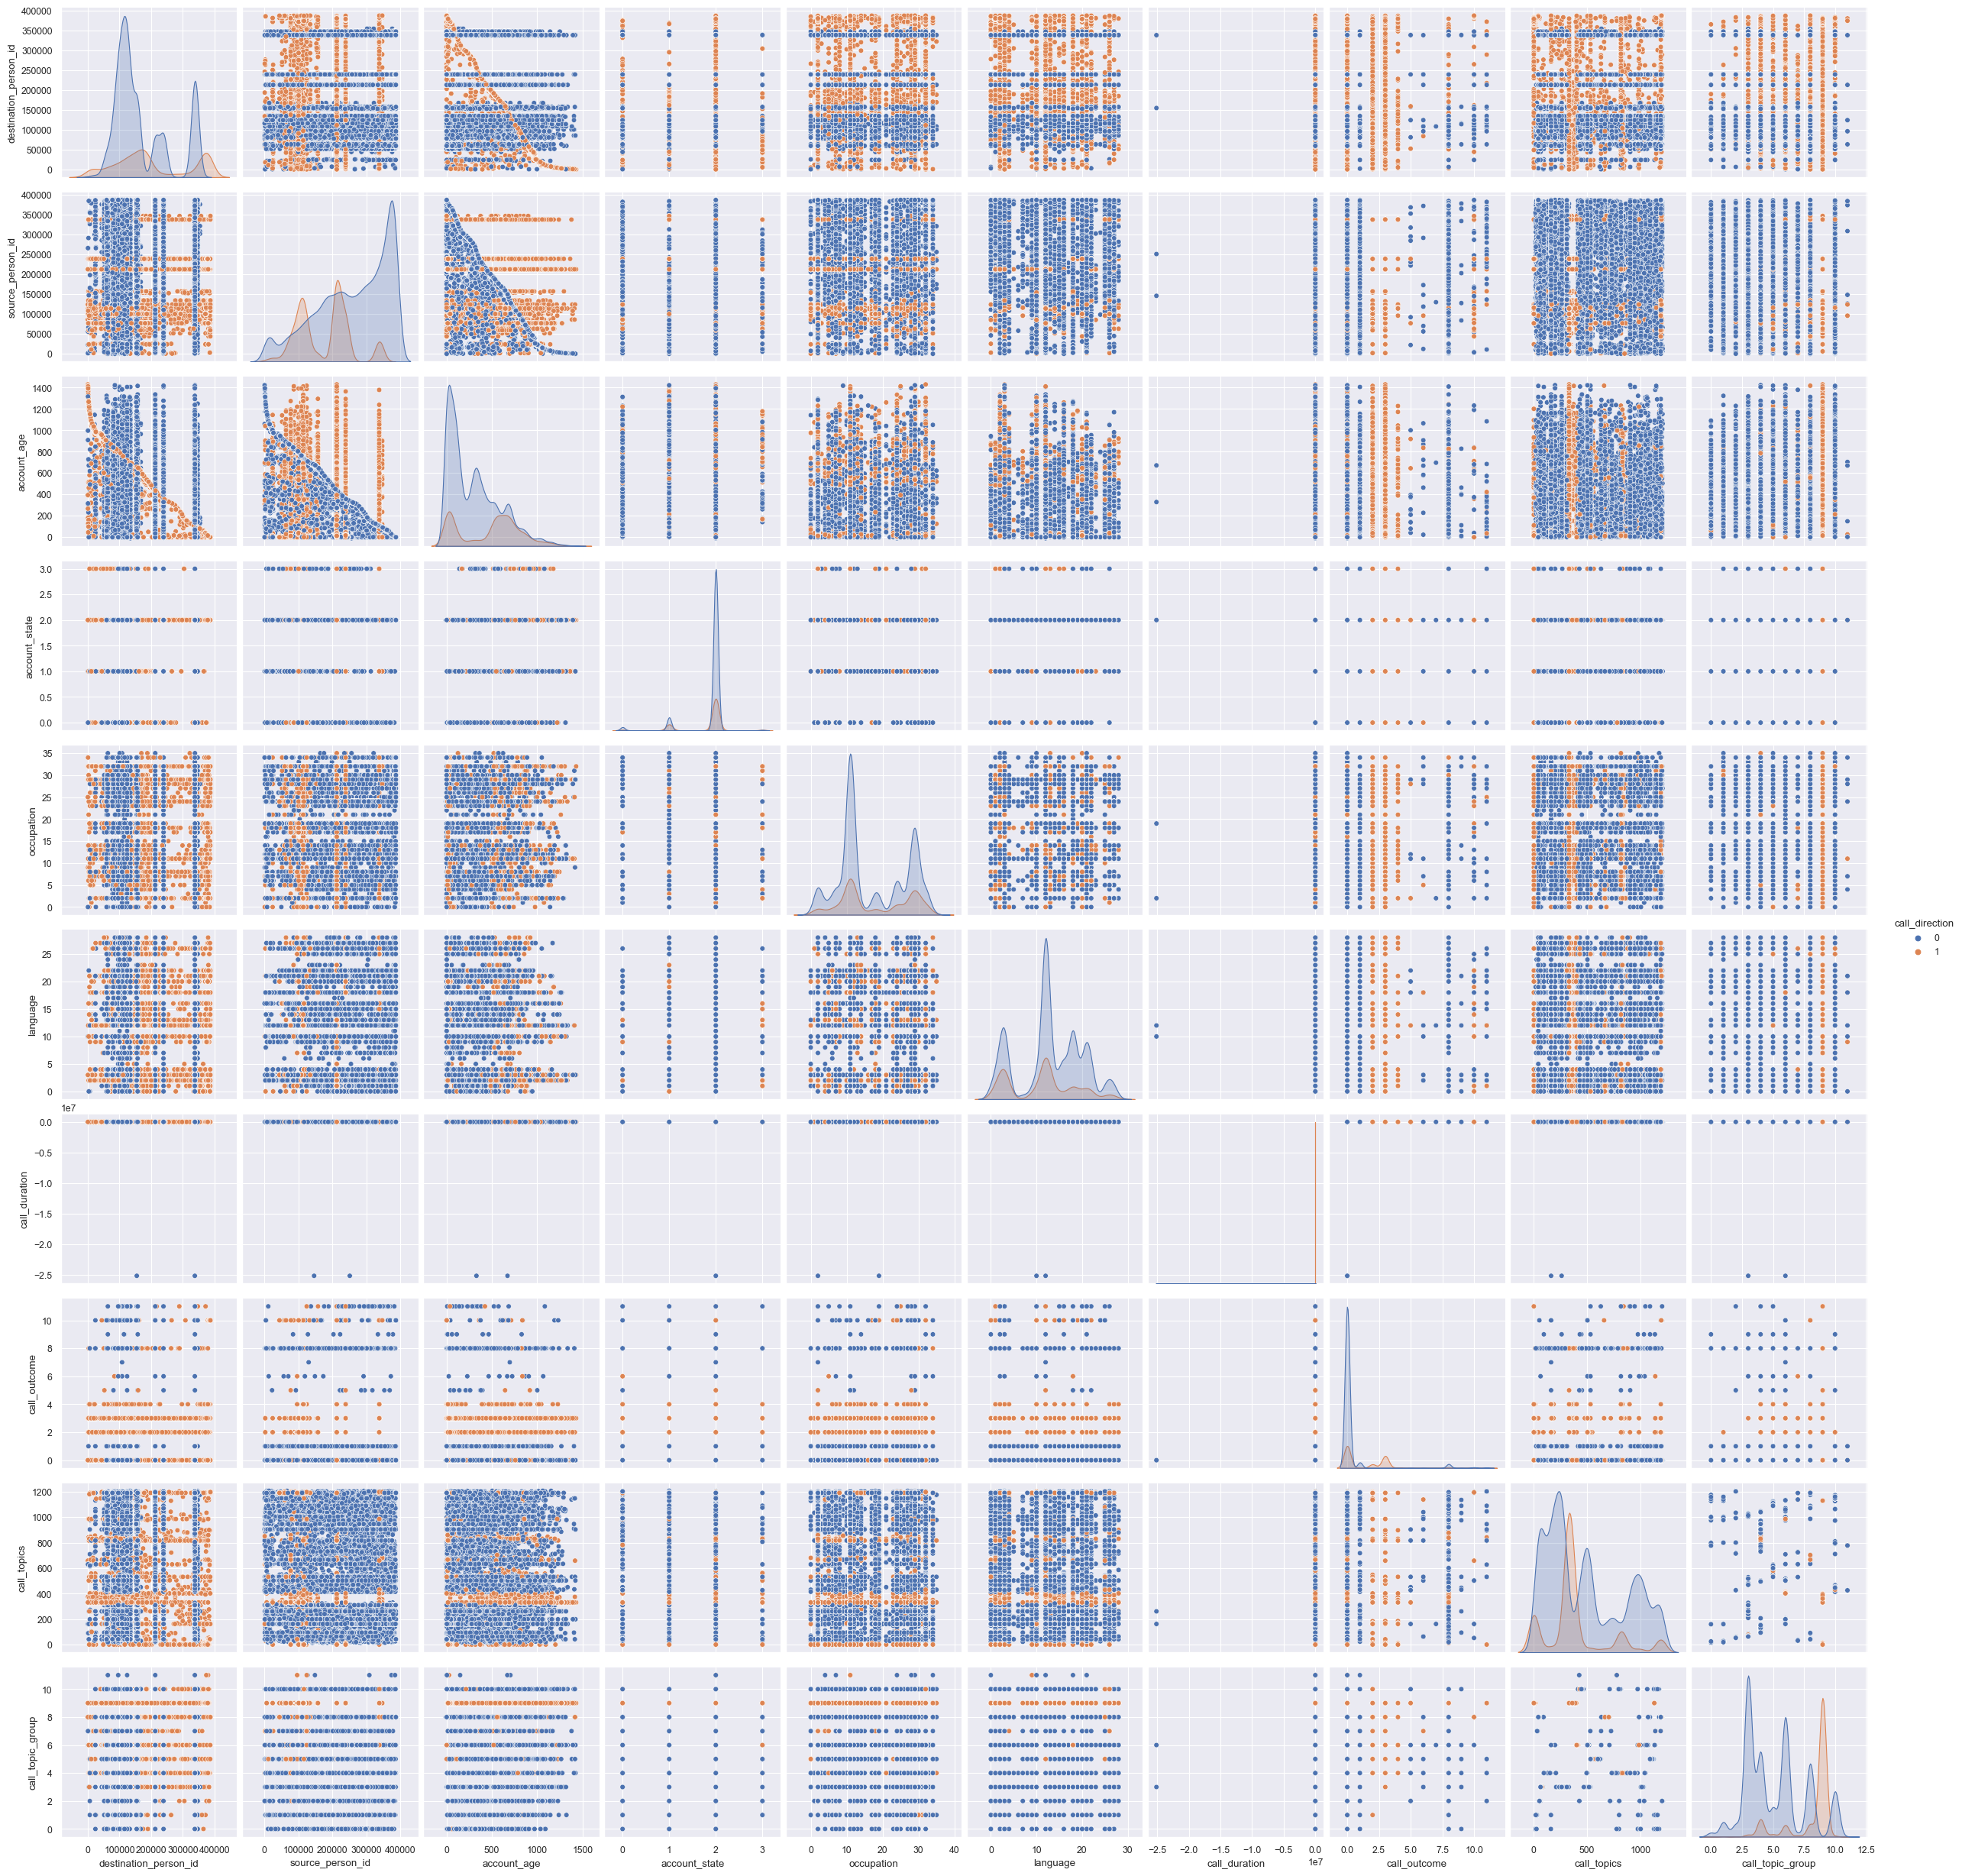

In [ ]:
sns.pairplot(data_, hue='call_direction')
plt.show()

> Now let us do the modelling using sklearn

> We have to split the data as necessary into training and test sets

In [ ]:
#split dataset in features and target variable
X = data_.loc[:, (data_.columns != 'call_direction') & (data_.columns != 'call_end_date')] # Features
y = data_.call_direction # Target variable

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
# Now we can model
from sklearn.linear_model import LogisticRegression

# using default parameters
model = LogisticRegression(solver='liblinear', random_state=0)

# fit the model with data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
# Let us evaluate the model using the confusion matrix and more
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4476,  385],
       [1373,  153]])

NameError: name 'Text' is not defined

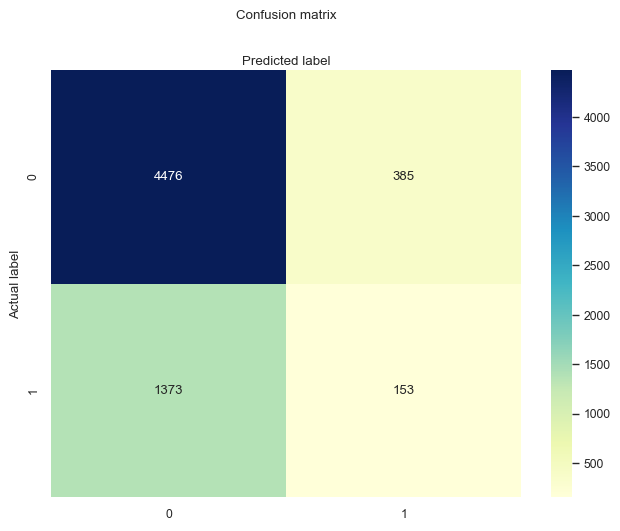

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,257.44,'Predicted label');

In [ ]:
# Let's evaluate the model using classification_report for accuracy, precision, and recall.

from sklearn.metrics import classification_report

target_names = ['Incoming', 'Outgoing']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Incoming       0.77      0.92      0.84      4861
    Outgoing       0.28      0.10      0.15      1526

    accuracy                           0.72      6387
   macro avg       0.52      0.51      0.49      6387
weighted avg       0.65      0.72      0.67      6387



### Well, you got a classification rate of 72%, considered as quite good accuracy.

> Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted calls are incoming, those calls have 77% predicted accuracy.

> Recall: If there are calls that are incoming in the test set and your Logistic Regression model can identify them 92% of the time.

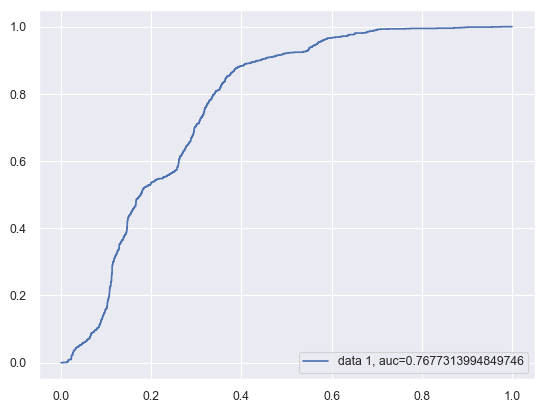

In [ ]:
# Lets make a ROC curve as well

'''
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.
'''
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

> The AUC score is 77% after rounding off. For more understanding of these metrices, please read the books I sent you in the google classroom

#### Since the question needs us to do a comparisson with other two models, let us just run them shortly and compare the accuracy score for the other two to logistic regression

### 2. DECISION TREE MODELLING

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9927978706748082


### 3. SUPPORT VECTOR MACHINE

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(cache_size=7000) # Polynomial Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8160325661499922
